In [2]:
import networkx as nx
import json
import matplotlib.pyplot as plt
from matplotlib import pylab

import numpy as np

G = nx.DiGraph()

with open('./posts.json') as f:
  posts = json.load(f)

for post in posts:
    # print(post)
    if post['root'] is True:
        G.add_node(post['user_id'])
    else:
        if post['is_not_push_post'] is True:
            G.add_edge(post['user_id'], post['reply_to'], weight=0.3)
        else:
            G.add_edge(post['user_id'], post['reply_to'], weight=1)
        

In [3]:
print(G.number_of_nodes())
print(G.number_of_edges())

4350
7407


In [8]:
hub, aut = nx.hits(G)
print(hub)
np.savetxt("hub.csv", hub, delimiter=",")
np.savetxt("aut.csv", aut, delimiter=",")

{'252142': 0.0002078492493214755, '321345': 0.00046321680528897354, '288093': 6.428487862435702e-07, '19842': 1.9285463587307107e-07, '303977': 6.428487862435702e-07, '61776': 1.9285463587307107e-07, '229019': 6.428487862435702e-07, '39576': 6.428487862435702e-07, '78349': 2.2482299800085972e-06, '79410': 1.9524508114488317e-06, '104218': 6.428487862435702e-07, '61282': 0.00041537032441215337, '195570': 6.437156136288499e-07, '111153': 1.707923330525126e-05, '13193': 1.9285463587307107e-07, '54344': 7.813763149863435e-142, '161767': 0.0, '156174': 6.428487862435702e-07, '10998': 6.428487862435702e-07, '256055': 1.9285463587307107e-07, '199261': 1.9285463587307107e-07, '225898': 6.428487862435702e-07, '112308': 6.428487862435702e-07, '56428': 3.880342418802552e-05, '180268': 1.9285463587307107e-07, '281492': 4.971651703412042e-192, '108467': 0.0, '142067': 6.428487862435702e-07, '59297': 0.00042426085343476793, '49018': 0.000519247728872508, '49753': 0.000535116821238458, '225100': 0.00

ValueError: Expected 1D or 2D array, got 0D array instead

In [44]:
 def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(10, 10), dpi=300)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.svg")

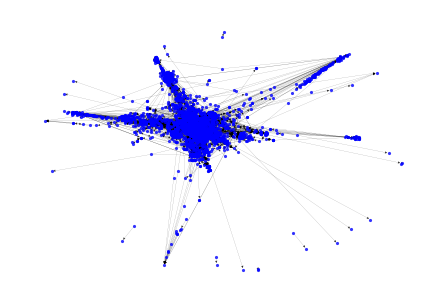

In [77]:
import matplotlib.pyplot as plt

options = {
    'node_color': 'blue',
    'node_size': 10,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
    'alpha': 0.8,
    'arrowsize': 5
}
nx.draw(G, **options)
plt.show()